# Introduction

# Genetic Programming (GP)

Genetic Programming (GP) is a computational approach inspired by natural evolution that is used to evolve computer programs to solve complex problems.

## Key Concepts

1. **Population**:
   - In GP, we start with a population of individuals. Each individual represents a candidate solution to the problem we're trying to solve. 
   - In this project, each individual will be an expression tree representing a mathematical function.

2. **Fitness Function**:
   - The fitness function evaluates how well each individual performs the task. 
   - In our case, it measures how close the output of the function represented by an individual's expression tree is to the desired output (which we obtain from the black box function).

3. **Selection**:
   - Individuals are selected from the population based on their fitness scores to undergo genetic operations like crossover and mutation. 
   - Individuals with higher fitness scores are more likely to be selected, mimicking the principle of "survival of the fittest".

4. **Crossover**:
   - Crossover is a genetic operation where two selected individuals (parents) exchange genetic information to produce offspring. 
   - In the context of expression trees, crossover involves swapping subtrees between two parent trees to create new offspring trees.

5. **Mutation**:
   - Mutation introduces random changes in individual trees to explore new areas of the search space. 
   - It helps maintain diversity in the population and prevent premature convergence to suboptimal solutions.

6. **Evolutionary Loop**:
   - The main loop of the genetic algorithm involves repeatedly applying selection, crossover, and mutation to evolve the population over multiple generations. 
   - This process continues until a termination condition is met.


# Representation for Expression Trees
## Descriptions
### TreeNode Class

The `TreeNode` class represents a node in the expression tree. Each node has a value, which can be an operator or operand, and references to its left and right children.

### ExpressionTree Class

The `ExpressionTree` class represents the expression tree itself. It has a `root` attribute that stores the root node of the tree. The constructor takes an expression string as input and constructs the expression tree using the `_construct_tree_helper` method.

### construct_tree Method

This method constructs the expression tree recursively. It first removes any unnecessary whitespace from the expression string. Then, it calls the `_construct_tree_helper` method, which is a helper method responsible for recursively constructing the tree.

### _construct_tree_helper Method

This method recursively constructs the tree by parsing the expression string. It identifies the operator with the lowest precedence and uses it as the root of the subtree. If no operator is found, it creates a leaf node with the operand. If the expression starts with "sin" or "cos", indicating a single operand function, it handles it accordingly. Then, it recursively constructs the left and right subtrees based on the position of the operator.

### display Method

The `display` method visualizes the expression tree using matplotlib. It calls the `plot_tree` method to plot the tree graphically.

### plot_tree Method

This method recursively plots the tree nodes using matplotlib. It traverses the tree in a depth-first manner, plotting each node and drawing edges between parent and child nodes.

### Example Usage

The example usage section demonstrates how to create an expression tree from a given expression string and display it graphically using matplotlib.



## Implementation

In [1]:
import matplotlib.pyplot as plt
import random
import math
import copy
import numpy as np


In [2]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def evaluate(self, x):
        if self.value == 'x':
            return x
        elif self.value == 'y':
            return random.random()  # Assuming y is a random variable for now
        elif self.value == 'sin':
            return np.sin(self.left.evaluate(x))
        elif self.value == 'cos':
            return np.cos(self.left.evaluate(x))
        elif self.value == '+':
            return self.left.evaluate(x) + self.right.evaluate(x)
        elif self.value == '-':
            return self.left.evaluate(x) - self.right.evaluate(x)
        elif self.value == '*':
            return self.left.evaluate(x) * self.right.evaluate(x)
        elif self.value == '/':
            right_val = self.right.evaluate(x)
            return self.left.evaluate(x) / right_val if right_val != 0 else 1  # Avoid division by zero
        elif self.value == '^':
            return self.left.evaluate(x) ** self.right.evaluate(x)
        else:
            return float(self.value)

    def get_all_nodes(self):
        nodes = [self]
        if self.left:
            nodes.extend(self.left.get_all_nodes())
        if self.right:
            nodes.extend(self.right.get_all_nodes())
        return nodes


class ExpressionTree:
    def __init__(self, expression):
        self.root = self.construct_tree(expression)

    def construct_tree(self, expression):
        expression = expression.replace(" ", "")
        return self._construct_tree_helper(expression)

    def _construct_tree_helper(self, expression):
        if expression.startswith("(") and expression.endswith(")"):
            expression = expression[1:-1]

        # Find the operator with the lowest precedence
        lowest_precedence = None
        lowest_index = -1
        level = 0
        for i in range(len(expression)):
            if expression[i] == "(":
                level += 1
            elif expression[i] == ")":
                level -= 1
            elif level == 0 and expression[i] in "+-*/^":
                if lowest_precedence is None or "+-*/^".index(expression[i]) < "+-*/^".index(lowest_precedence):
                    lowest_precedence = expression[i]
                    lowest_index = i
        # If no operator found, it must be a single operand
        if lowest_precedence is None:
            if expression.startswith("sin"):
                # Handle single operand functions
                op = TreeNode("sin")
                op.left = self._construct_tree_helper(expression[4:-1])  
                return op
            elif expression.startswith("cos"):
                # Handle single operand functions
                op = TreeNode("cos")
                op.left = self._construct_tree_helper(expression[4:-1]) 
                return op
            else:
                return TreeNode(expression)
        # Create the root node
        root = TreeNode(expression[lowest_index])
        # Construct left and right subtrees recursively
        # print("Expression:", expression)
        # print("Lowest index:", lowest_index)
        # print("Left expression:", expression[:lowest_index])
        # print("Right expression:", expression[lowest_index + 1:])
        root.left = self._construct_tree_helper(expression[:lowest_index])
        root.right = self._construct_tree_helper(expression[lowest_index + 1:])
        return root



    def display(self):
        plt.figure(figsize=(8, 6))
        self.plot_tree(self.root)
        plt.axis('off')  # Hide axis
        plt.show()

    def plot_tree(self, node, pos=(0, 0), level=1, width=800, height=400):
        if node is not None:
            x, y = pos
            plt.text(x, y, str(node.value), style='italic', bbox={'facecolor': 'white', 'pad': 10})
            next_level = height / (level + 1)
            if node.left is not None:
                left_pos = (x - width / (2 * (level + 1)), y - next_level)
                plt.plot([x, left_pos[0]], [y, left_pos[1]], 'k-', lw=2)
                self.plot_tree(node.left, left_pos, level + 1, width, height)
            if node.right is not None:
                right_pos = (x + width / (2 * (level + 1)), y - next_level)
                plt.plot([x, right_pos[0]], [y, right_pos[1]], 'k-', lw=2)
                self.plot_tree(node.right, right_pos, level + 1, width, height)

    def to_expression_string(self):
        return self._to_expression_string_helper(self.root)

    def _to_expression_string_helper(self, node):
        if node is None:
            return ""
        if node.left is None and node.right is None:
            return str(node.value)
        if node.value in ["sin", "cos"]:
            return f"{node.value}({self._to_expression_string_helper(node.left)})"
        else:
            left_exp = self._to_expression_string_helper(node.left)
            right_exp = self._to_expression_string_helper(node.right)
            return f"({left_exp} {node.value} {right_exp})"

# GeneticAlgorithm Class

The `GeneticAlgorithm` class is responsible for managing the genetic algorithm parameters and operations.

## generate_random_expression Method

This method generates a random expression recursively. At each depth level, there's a chance to generate either an operand or an operator. If an operand is chosen, it randomly selects from 'x', 'y', 'sin(x)', or 'cos(x)'. If an operator is chosen, it randomly selects from '+', '-', '*', '/', or '^' and recursively generates subexpressions.

## generate_initial_population Method

This method generates the initial population by creating a specified number of random expression trees. Each individual in the population is created by generating a random expression of random depth.




In [3]:
class GeneticAlgorithm:
    def __init__(self, population_size, max_depth, training_set, crossover_rate=0.8, mutation_rate=0.2):
        self.population_size = population_size
        self.max_depth = max_depth
        self.training_set = training_set
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate

    def generate_random_expression(self, depth):
        if depth == 0 or (random.random() < 0.3 and depth < self.max_depth):
            # Generate a random operand
            operands = ['x', 'y', 'sin(x)', 'cos(x)']
            return random.choice(operands)
        else:
            # Generate a random operator
            operators = ['+', '-', '*', '/', '^']
            operator = random.choice(operators)
            return '(' + operator.join([self.generate_random_expression(depth - 1) for _ in range(2)]) + ')'

    def generate_initial_population(self):
        population = []
        for _ in range(self.population_size):
            depth = random.randint(1, self.max_depth)
            expression = self.generate_random_expression(depth)
            population.append(ExpressionTree(expression))
        return population

    def evaluate_fitness(self, individual):
        total_error = 0.0
        for point in self.training_set:
            x, y_true = point
            y_pred = individual.root.evaluate(x)
            total_error += abs(y_true - y_pred)
        return total_error

    def selection(self, population):
        # Perform tournament selection
        tournament_size = min(3, len(population))
        selected = []
        for _ in range(len(population)):
            participants = random.sample(population, tournament_size)
            winner = min(participants, key=lambda x: self.evaluate_fitness(x))
            selected.append(winner)
        return selected

    def crossover(self, parent1, parent2):
        if random.random() < self.crossover_rate:
            # Perform subtree crossover
            crossover_point1 = random.choice(parent1.root.get_all_nodes())
            crossover_point2 = random.choice(parent2.root.get_all_nodes())
            # Ensure crossover points are not None and have left and right children
            if crossover_point1 and crossover_point2 and crossover_point1.left and crossover_point1.right and crossover_point2.left and crossover_point2.right:
                crossover_point1.value, crossover_point2.value = crossover_point2.value, crossover_point1.value
            else:
                pass

    def mutation(self, individual):
        if random.random() < self.mutation_rate:
            # Perform subtree mutation
            mutation_point = random.choice(individual.root.get_all_nodes())
            # Ensure mutation point is not None and has left and right children
            if mutation_point and mutation_point.left and mutation_point.right:
                if mutation_point.value in ['+', '-', '*', '/', '^', 'sin', 'cos']:
                    mutation_point.value = random.choice(['+', '-', '*', '/', '^', 'sin', 'cos', 'x', 'y'])
                else:
                    mutation_point.value = str(random.uniform(-10, 10))
            else:
                pass



    def evolutionary_loop(self, population):
        # Selection
        selected = self.selection(population)
        # Ensure even number of selected individuals
        if len(selected) % 2 != 0:
            selected.pop()  # Discard the last individual
        # Crossover
        offspring = []
        for i in range(0, len(selected), 2):
            parent1, parent2 = selected[i], selected[i+1]
            child1 = copy.deepcopy(parent1)
            child2 = copy.deepcopy(parent2)
            self.crossover(child1, child2)
            offspring.extend([child1, child2])
        # Mutation
        for individual in offspring:
            self.mutation(individual)
        # # Debugging
        # print("Offspring after crossover and mutation:")
        # for i, ind in enumerate(offspring):
        #     print(f"Individual {i}: {ind.root}")
        return offspring

    def termination_condition(self, generations):
        return generations >= 100

Individual 1:
Expression: cos(x)

Individual 1 Fitness: 29.865837027279447


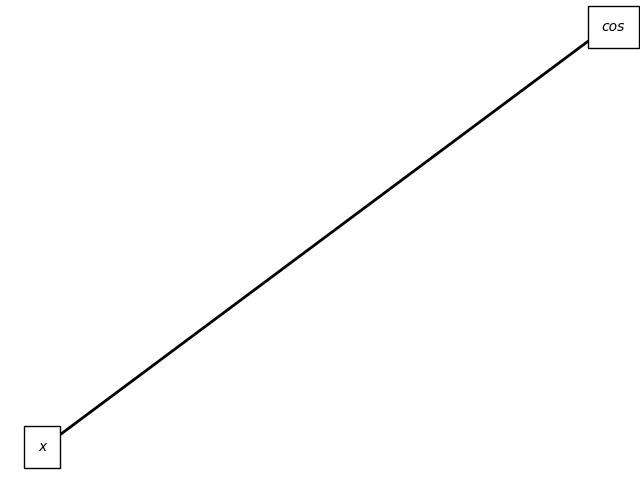

Individual 2:
Expression: (((cos(x) * y) * (y - y)) ^ sin(x))

Individual 2 Fitness: 27.872190292003395


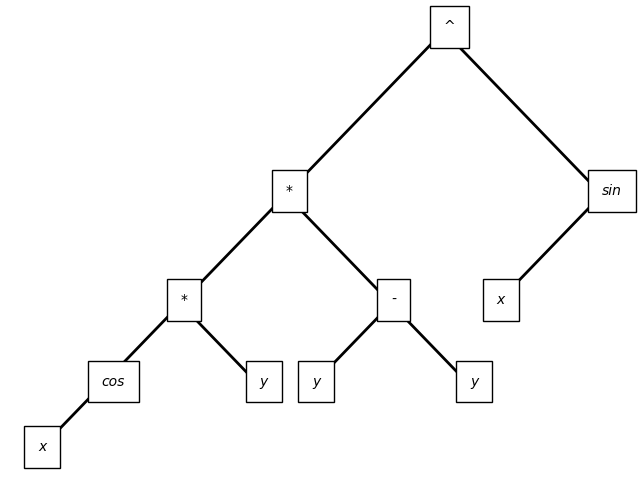

Individual 3:
Expression: (sin(x) + cos(x))

Individual 3 Fitness: 27.973948607586003


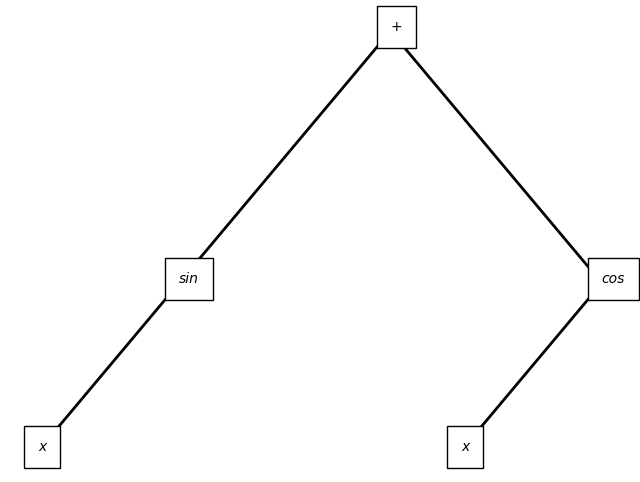

Individual 4:
Expression: (((cos(x) - cos(x)) * cos(x)) * (x - (x * y)))

Individual 4 Fitness: 29.0


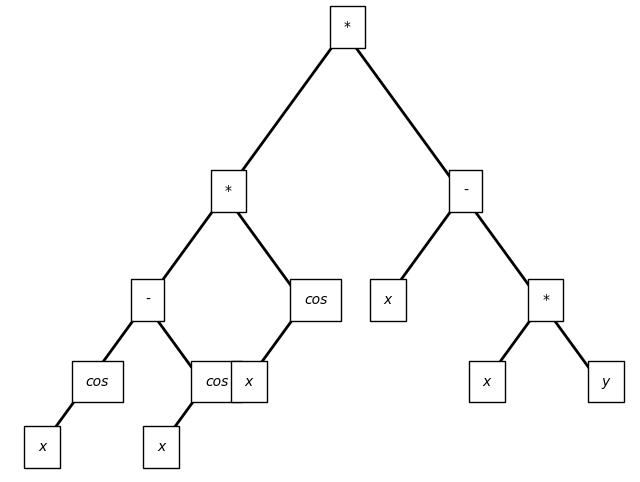

Individual 5:
Expression: (x ^ ((cos(x) / y) / (y ^ sin(x))))

Individual 5 Fitness: 27.790261325074624


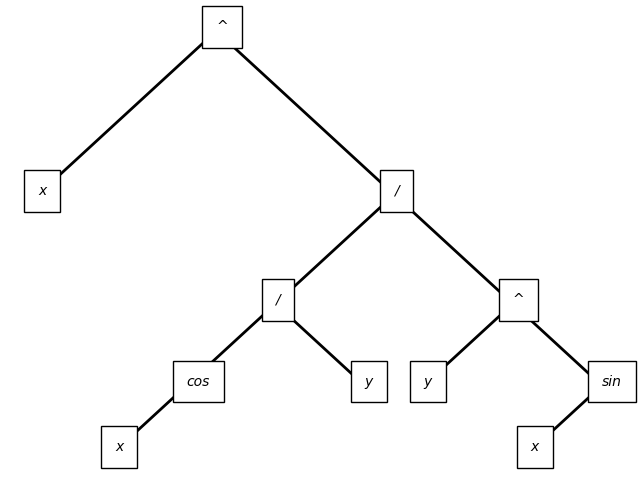

Generation 1, Best Fitness: 27.441362464657995
Generation 2, Best Fitness: 27.651043003668146
Generation 3, Best Fitness: 27.006979647320897
Generation 4, Best Fitness: 27.49478443817527
Generation 5, Best Fitness: 26.784409406016756
Generation 6, Best Fitness: 27.88886761290225
Generation 7, Best Fitness: 26.534702049772797
Generation 8, Best Fitness: 27.49805117234871
Generation 9, Best Fitness: 26.65532600279957
Generation 10, Best Fitness: 26.619483803046915
Generation 11, Best Fitness: 26.92061757678109
Generation 12, Best Fitness: nan
Generation 13, Best Fitness: 27.729394185248545
Generation 14, Best Fitness: 26.149511380049816
Generation 15, Best Fitness: 26.5426453195324
Generation 16, Best Fitness: 27.132172305783907
Generation 17, Best Fitness: 26.3569559809225
Generation 18, Best Fitness: 26.359823789763855
Generation 19, Best Fitness: 16.809463149262225
Generation 20, Best Fitness: 16.809463149262225
Generation 21, Best Fitness: 16.809463149262225
Generation 22, Best Fitne

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_4064\1094405848.py:26: RuntimeWarning: invalid value encountered in scalar power
  return self.left.evaluate(x) ** self.right.evaluate(x)


In [4]:


training_set = [(1, 5), (2, 9), (3, 15)]  # Example training set with (x, y) pairs
genetic_algorithm = GeneticAlgorithm(population_size=5, max_depth=3, training_set=training_set)
population = genetic_algorithm.generate_initial_population()

for i, tree in enumerate(population):
    print(f"Individual {i+1}:\nExpression: {tree.to_expression_string()}\n")
    fitness = genetic_algorithm.evaluate_fitness(tree)
    print(f"Individual {i+1} Fitness: {fitness}")
    tree.display()

# Evolutionary loop
generations = 0
while not genetic_algorithm.termination_condition(generations):
    population = genetic_algorithm.evolutionary_loop(population)
    best_individual = min(population, key=lambda x: genetic_algorithm.evaluate_fitness(x))
    print(f"Generation {generations+1}, Best Fitness: {genetic_algorithm.evaluate_fitness(best_individual)}")
    generations += 1

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_4064\1094405848.py:26: RuntimeWarning: divide by zero encountered in scalar power
  return self.left.evaluate(x) ** self.right.evaluate(x)
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_4064\1094405848.py:26: RuntimeWarning: invalid value encountered in scalar power
  return self.left.evaluate(x) ** self.right.evaluate(x)
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_4064\1094405848.py:26: RuntimeWarning: overflow encountered in scalar power
  return self.left.evaluate(x) ** self.right.evaluate(x)


Generation 1, Best Fitness: nan
Generation 2, Best Fitness: nan
Generation 3, Best Fitness: 51.16379962775465
Generation 4, Best Fitness: 37.10990427927486
Generation 5, Best Fitness: 38.01684861885076
Generation 6, Best Fitness: 38.09464147727859
Generation 7, Best Fitness: 28.387257893407114
Generation 8, Best Fitness: 28.387257893407114
Generation 9, Best Fitness: 28.387257893407114
Generation 10, Best Fitness: 28.387257893407114
Generation 11, Best Fitness: nan
Generation 12, Best Fitness: 28.387257893407114
Generation 13, Best Fitness: 28.387257893407114
Generation 14, Best Fitness: 28.387257893407114
Generation 15, Best Fitness: 28.387257893407114


C:\Users\Mahdi\AppData\Local\Temp\ipykernel_4064\1094405848.py:13: RuntimeWarning: invalid value encountered in sin
  return np.sin(self.left.evaluate(x))


Generation 16, Best Fitness: 28.387257893407114
Generation 17, Best Fitness: nan
Generation 18, Best Fitness: 28.387257893407114
Generation 19, Best Fitness: 28.387257893407114
Generation 20, Best Fitness: 28.387257893407114
Generation 21, Best Fitness: 28.387257893407114
Generation 22, Best Fitness: nan
Generation 23, Best Fitness: nan
Generation 24, Best Fitness: 28.387257893407114
Generation 25, Best Fitness: nan
Generation 26, Best Fitness: 28.387257893407114
Generation 27, Best Fitness: 28.387257893407114
Generation 28, Best Fitness: 28.387257893407114


C:\Users\Mahdi\AppData\Local\Temp\ipykernel_4064\1094405848.py:21: RuntimeWarning: invalid value encountered in scalar multiply
  return self.left.evaluate(x) * self.right.evaluate(x)


Generation 29, Best Fitness: nan
Generation 30, Best Fitness: 28.387257893407114
Generation 31, Best Fitness: 28.387257893407114
Generation 32, Best Fitness: 28.387257893407114
Generation 33, Best Fitness: 28.387257893407114
Generation 34, Best Fitness: nan
Generation 35, Best Fitness: nan
Generation 36, Best Fitness: 28.387257893407114
Generation 37, Best Fitness: nan
Generation 38, Best Fitness: nan
Generation 39, Best Fitness: 28.387257893407114
Generation 40, Best Fitness: 28.387257893407114
Generation 41, Best Fitness: 28.387257893407114
Generation 42, Best Fitness: nan
Generation 43, Best Fitness: 28.387257893407114
Generation 44, Best Fitness: 28.387257893407114
Generation 45, Best Fitness: nan
Generation 46, Best Fitness: 28.387257893407114
Generation 47, Best Fitness: 28.387257893407114
Generation 48, Best Fitness: 28.387257893407114
Generation 49, Best Fitness: 28.387257893407114
Generation 50, Best Fitness: nan
Generation 51, Best Fitness: 28.387257893407114
Generation 52, B

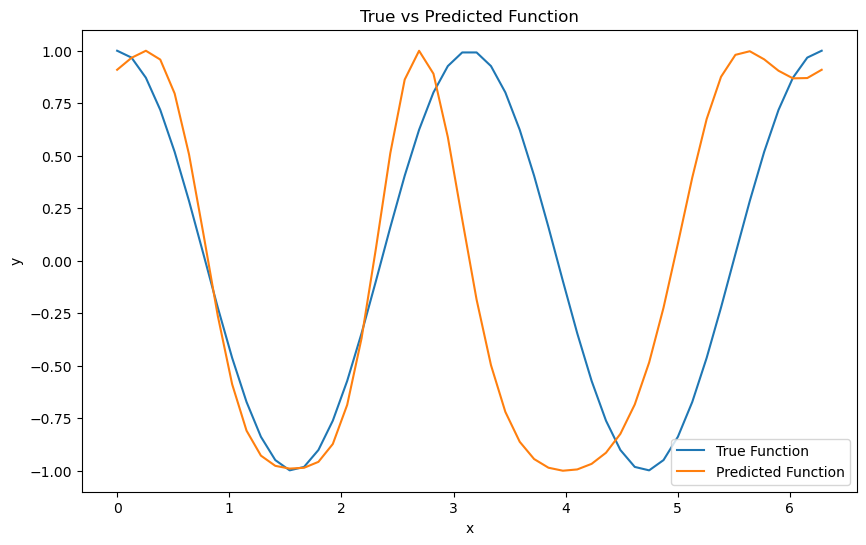

Predicted Function ExpressionTree


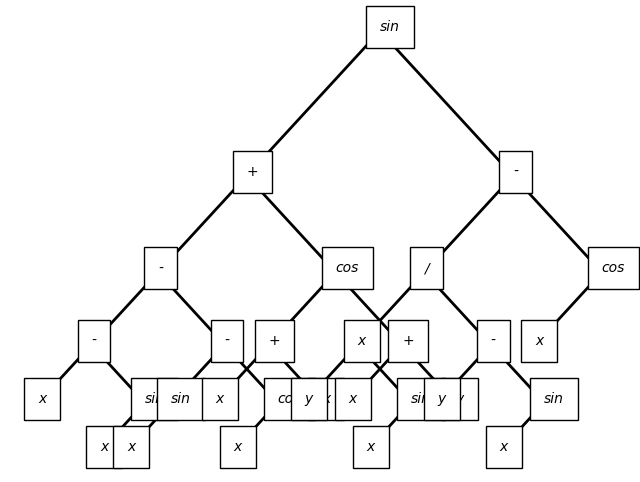

In [5]:


# Step 1: Generate training data from a known function
def true_function(x):
    return np.cos(2 * x)

training_set_size = 100
x_train = np.linspace(0, np.pi, training_set_size)
y_train = true_function(x_train)

training_set = list(zip(x_train, y_train))

# Step 2: Train the genetic algorithm
genetic_algorithm = GeneticAlgorithm(population_size=100, max_depth=5, training_set=training_set)
population = genetic_algorithm.generate_initial_population()

# Evolutionary loop
generations = 0
while not genetic_algorithm.termination_condition(generations):
    population = genetic_algorithm.evolutionary_loop(population)
    print(f"Generation {generations+1}, Best Fitness: {genetic_algorithm.evaluate_fitness(min(population, key=genetic_algorithm.evaluate_fitness))}")
    generations += 1

# Step 3: Validation
validation_set_size = 50
x_val = np.linspace(0, 2*np.pi, validation_set_size)
y_val_true = true_function(x_val)

# Predict using the best individual from the last generation
best_individual = min(population, key=genetic_algorithm.evaluate_fitness)
y_val_pred = [best_individual.root.evaluate(x) for x in x_val]

# Step 4: Measure MSE
mse = np.mean((y_val_true - y_val_pred) ** 2)
print(f"Validation MSE: {mse}")

# Step 5: Visualization
plt.figure(figsize=(10, 6))
plt.plot(x_val, y_val_true, label='True Function')
plt.plot(x_val, y_val_pred, label='Predicted Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs Predicted Function')
plt.legend()
plt.show()
print('Predicted Function ExpressionTree')
best_individual.display()



Generation 1, Best Fitness: 0.0


C:\Users\Mahdi\AppData\Local\Temp\ipykernel_4064\1094405848.py:26: RuntimeWarning: invalid value encountered in scalar power
  return self.left.evaluate(x) ** self.right.evaluate(x)
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_4064\1094405848.py:26: RuntimeWarning: divide by zero encountered in scalar power
  return self.left.evaluate(x) ** self.right.evaluate(x)


Generation 2, Best Fitness: 0.0
Generation 3, Best Fitness: 0.0
Generation 4, Best Fitness: 0.0
Generation 5, Best Fitness: 0.0
Generation 6, Best Fitness: nan
Generation 7, Best Fitness: 0.0
Generation 8, Best Fitness: 0.0
Generation 9, Best Fitness: 0.0
Generation 10, Best Fitness: 0.0
Generation 11, Best Fitness: 0.0
Generation 12, Best Fitness: 0.0
Generation 13, Best Fitness: 0.0
Generation 14, Best Fitness: 0.0
Generation 15, Best Fitness: 0.0
Generation 16, Best Fitness: 0.0
Generation 17, Best Fitness: 0.0
Generation 18, Best Fitness: 0.0
Generation 19, Best Fitness: 0.0
Generation 20, Best Fitness: 0.0
Generation 21, Best Fitness: 0.0
Generation 22, Best Fitness: 0.0
Generation 23, Best Fitness: 0.0
Generation 24, Best Fitness: 0.0
Generation 25, Best Fitness: 0.0
Generation 26, Best Fitness: 0.0
Generation 27, Best Fitness: 0.0
Generation 28, Best Fitness: 0.0
Generation 29, Best Fitness: 0.0
Generation 30, Best Fitness: 0.0
Generation 31, Best Fitness: 0.0
Generation 32, Bes

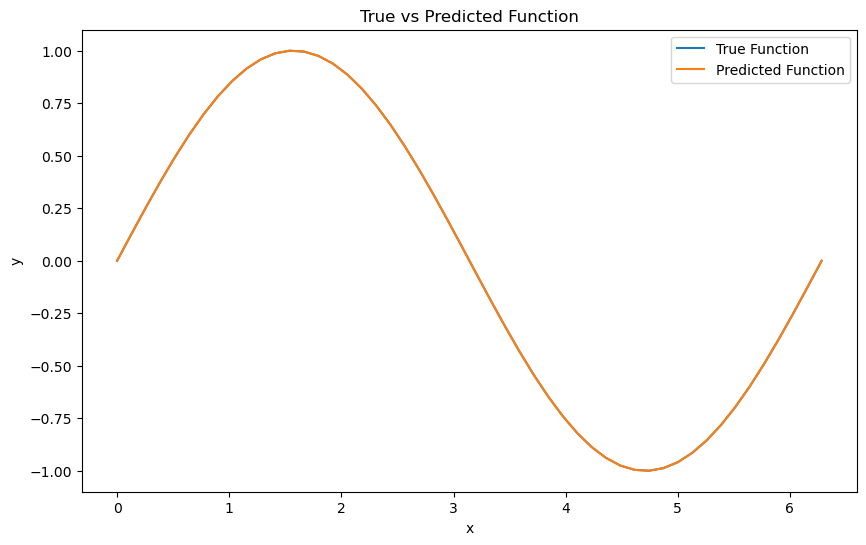

Predicted Function ExpressionTree


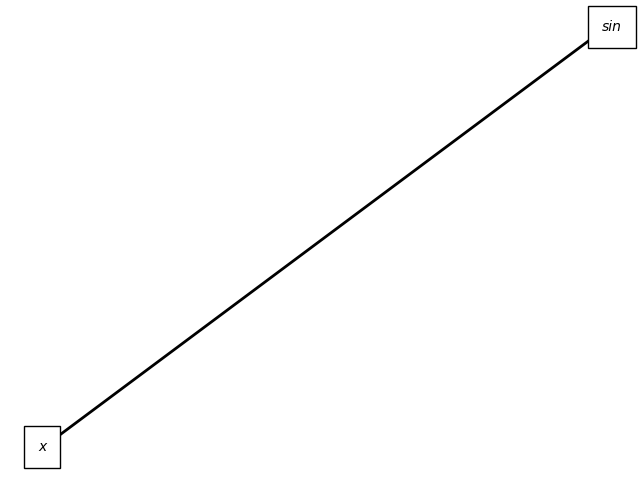

In [6]:


# Step 1: Generate training data from a known function
def true_function(x):
    return np.sin(x)

training_set_size = 100
x_train = np.linspace(0, np.pi/4, training_set_size)
y_train = true_function(x_train)

training_set = list(zip(x_train, y_train))

# Step 2: Train the genetic algorithm
genetic_algorithm = GeneticAlgorithm(population_size=100, max_depth=5, training_set=training_set)
population = genetic_algorithm.generate_initial_population()

# Evolutionary loop
generations = 0
while not genetic_algorithm.termination_condition(generations):
    population = genetic_algorithm.evolutionary_loop(population)
    print(f"Generation {generations+1}, Best Fitness: {genetic_algorithm.evaluate_fitness(min(population, key=genetic_algorithm.evaluate_fitness))}")
    generations += 1

# Step 3: Validation
validation_set_size = 50
x_val = np.linspace(0, 2*np.pi, validation_set_size)
y_val_true = true_function(x_val)

# Predict using the best individual from the last generation
best_individual = min(population, key=genetic_algorithm.evaluate_fitness)
y_val_pred = [best_individual.root.evaluate(x) for x in x_val]

# Step 4: Measure MSE
mse = np.mean((y_val_true - y_val_pred) ** 2)
print(f"Validation MSE: {mse}")

# Step 5: Visualization
plt.figure(figsize=(10, 6))
plt.plot(x_val, y_val_true, label='True Function')
plt.plot(x_val, y_val_pred, label='Predicted Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs Predicted Function')
plt.legend()
plt.show()
print('Predicted Function ExpressionTree')
best_individual.display()



C:\Users\Mahdi\AppData\Local\Temp\ipykernel_4064\1094405848.py:26: RuntimeWarning: invalid value encountered in scalar power
  return self.left.evaluate(x) ** self.right.evaluate(x)
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_4064\1094405848.py:26: RuntimeWarning: divide by zero encountered in scalar power
  return self.left.evaluate(x) ** self.right.evaluate(x)
C:\Users\Mahdi\AppData\Local\Temp\ipykernel_4064\1094405848.py:26: RuntimeWarning: overflow encountered in scalar power
  return self.left.evaluate(x) ** self.right.evaluate(x)


Generation 1, Best Fitness: 88.70611561129786
Generation 2, Best Fitness: nan
Generation 3, Best Fitness: nan
Generation 4, Best Fitness: 66.5704192966395
Generation 5, Best Fitness: nan
Generation 6, Best Fitness: 65.17213061824766
Generation 7, Best Fitness: 67.4104179827986
Generation 8, Best Fitness: 61.89313204137115
Generation 9, Best Fitness: 70.35040836989596
Generation 10, Best Fitness: 68.353161807844
Generation 11, Best Fitness: 68.81397367985117
Generation 12, Best Fitness: 68.39733667390772
Generation 13, Best Fitness: 70.53680932405165
Generation 14, Best Fitness: nan
Generation 15, Best Fitness: 64.84245485483896
Generation 16, Best Fitness: 65.01848670584292
Generation 17, Best Fitness: nan
Generation 18, Best Fitness: 69.76129276266973
Generation 19, Best Fitness: 66.03613516100904
Generation 20, Best Fitness: nan
Generation 21, Best Fitness: nan
Generation 22, Best Fitness: nan
Generation 23, Best Fitness: 65.75889525306708
Generation 24, Best Fitness: 70.914647221268

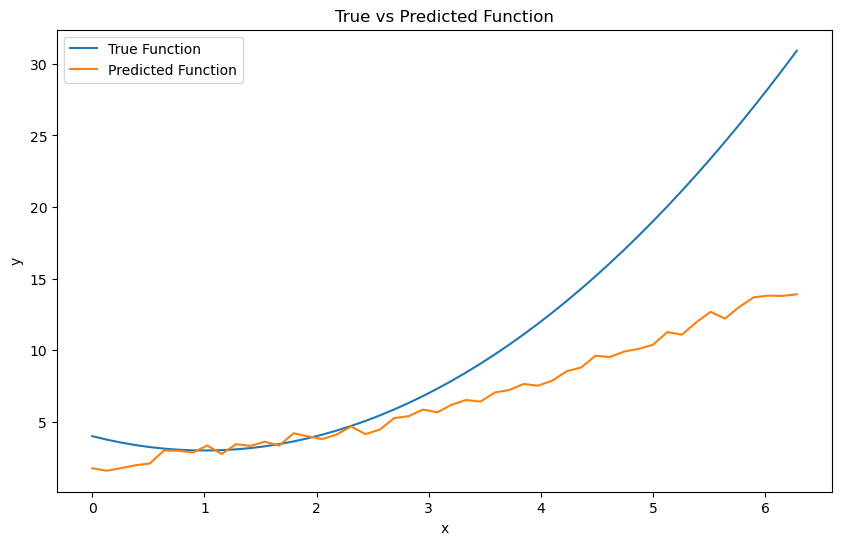

Predicted Function ExpressionTree


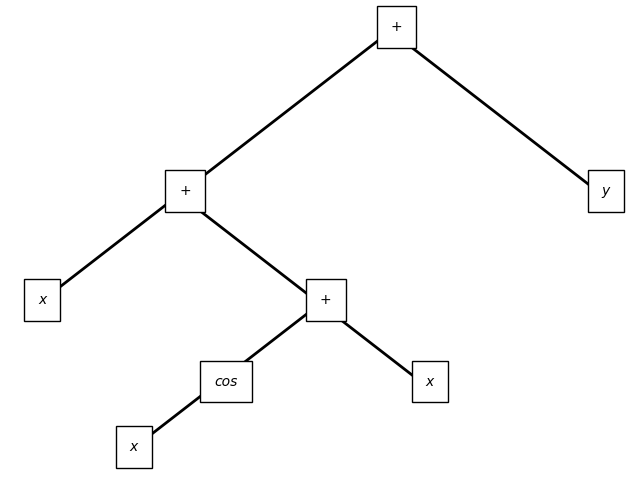

In [9]:


# Step 1: Generate training data from a known function
def true_function(x):
    return x**2 - 2*x +4

training_set_size = 100
x_train = np.linspace(0, 2, training_set_size)
y_train = true_function(x_train)

training_set = list(zip(x_train, y_train))

# Step 2: Train the genetic algorithm
genetic_algorithm = GeneticAlgorithm(population_size=200, max_depth=5, training_set=training_set)
population = genetic_algorithm.generate_initial_population()

# Evolutionary loop
generations = 0
while not genetic_algorithm.termination_condition(generations):
    population = genetic_algorithm.evolutionary_loop(population)
    print(f"Generation {generations+1}, Best Fitness: {genetic_algorithm.evaluate_fitness(min(population, key=genetic_algorithm.evaluate_fitness))}")
    generations += 1

# Step 3: Validation
validation_set_size = 50
x_val = np.linspace(0, 2*np.pi, validation_set_size)
y_val_true = true_function(x_val)

# Predict using the best individual from the last generation
best_individual = min(population, key=genetic_algorithm.evaluate_fitness)
y_val_pred = [best_individual.root.evaluate(x) for x in x_val]

# Step 4: Measure MSE
mse = np.mean((y_val_true - y_val_pred) ** 2)
print(f"Validation MSE: {mse}")

# Step 5: Visualization
plt.figure(figsize=(10, 6))
plt.plot(x_val, y_val_true, label='True Function')
plt.plot(x_val, y_val_pred, label='Predicted Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs Predicted Function')
plt.legend()
plt.show()
print('Predicted Function ExpressionTree')
best_individual.display()

